In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulation Question 1: 
We plotted each 200 consecutive data points with the same color!

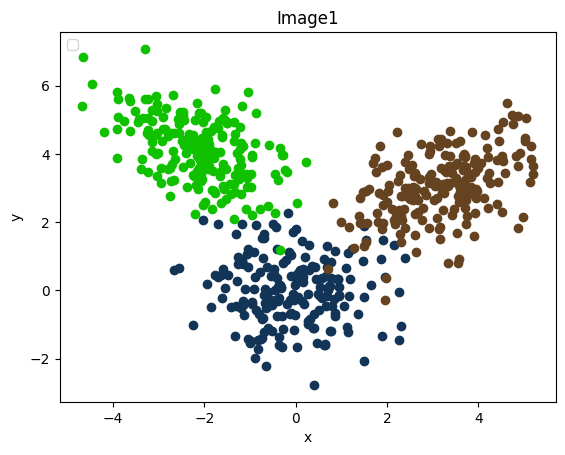

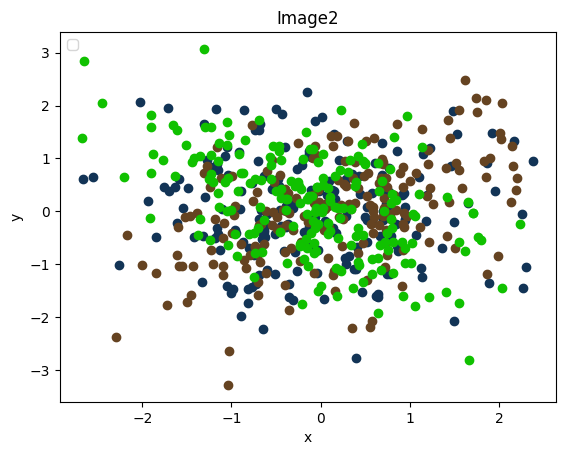

In [4]:
df1 = pd.read_csv("Image1.csv")
df2 = pd.read_csv("Image2.csv")
f1 = plt.figure(1)
plt.scatter(df1['0'][0:199],df1['1'][0:199],color='#123456')
plt.scatter(df1['0'][200:399],df1['1'][200:399],color='#654321')
plt.scatter(df1['0'][400:599],df1['1'][400:599],color='#10c100')
plt.legend(loc="upper left")
plt.title("Image1")
plt.xlabel("x")
plt.ylabel("y")
f1.show()
f2 = plt.figure(2)
plt.scatter(df2['0'][0:199],df2['1'][0:199],color='#123456')
plt.scatter(df2['0'][200:399],df2['1'][200:399],color='#654321')
plt.scatter(df2['0'][400:599],df2['1'][400:599],color='#10c100')
plt.legend(loc="upper left")
plt.title("Image2")
plt.xlabel("x")
plt.ylabel("y")
f2.show()

In [56]:
df1 = pd.read_csv("Image1.csv")
df1 = df1.sample(frac = 1)
df2 = pd.read_csv("Image2.csv")

The initialization below was done manually exactly the way it was mentioned
in Theory Question 4:

In [60]:
def initializer(x):
    a1=np.array(x.loc[:,('0','1')])
    means = np.zeros((3, 2))
    pis = np.zeros((3))
    a = -1
    for i in range(600):
        xi=a1[i]
        if (i % 200 == 0):
            a += 1
            pis[a] = 1 / 3
        means[a] = means[a] + xi / 200
    a = -1
    covas = np.zeros((3, 2, 2))
    for i in range(600):
        xi=a1[i]
        if (i % 200 == 0):
            a += 1
        temp = xi - means[a]
        a_2d = temp.reshape((1, -1))
        tte=temp.reshape(temp.shape+(1,))
        covas[a] = covas[a] + np.matmul(tte,a_2d) / 200
    return pis, covas, means
pis1, covs1, means1=initializer(df1)
pis2, covs2, means2=initializer(df2)

# Simulation Question 2:
The E-Step function below was done manually exactly the way it was mentioned in Theory Question 4:(In this question argmax(w[i]) indicates which distribution, data i had been assigned to, which is reflected in making R matrix.) 

In [58]:
def E_step(x,pis,covs,means):
    w=np.zeros((600,3))
    R=np.zeros((600,3))
    a1=np.array(x.loc[:,('0','1')])
    for i in range(600):
      xi=a1[i]
      for k in range(3):
        a=xi-means[k]
        a_2d = a.reshape((1, -1))
        tte=a.reshape(a.shape+(1,))
        sinv=np.linalg.inv(covs[k])
        atran=np.transpose(a)
        temp=np.matmul(a_2d,sinv)
        temp=np.matmul(temp,tte)
        w[i][k]=pis[k]*np.exp(-1/2*temp)/np.sqrt(np.linalg.det(covs[k]))
      abc=w[i][0]+w[i][1]+w[i][2]
      w[i][0]/=abc
      w[i][1]/=abc
      w[i][2]/=abc
      R[i,np.argmax(w[i])]=1
    return w, R
w1, R1 = E_step(df1,pis1, covs1, means1)
w2, R2 = E_step(df2,pis2, covs2, means2)
print("R1:")
print(R1)
print("R2:")
print(R2)

R1:
[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
R2:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


# Simulation Question 3: 
The M-Step function below was done manually exactly the way it was mentioned in Theory Question 4:

In [59]:
def M_step(x,pis,covs,means,w):
    a1=np.array(x.loc[:,('0','1')])
    sum2=np.array([sum(w[:,0]),sum(w[:,1]),sum(w[:,2])])
    sum1=np.zeros((3,2))
    sum3=np.zeros((3,2,2))
    for i in range(600):
      xi=a1[i]
      for k in range(3):
        sum1[k]+=w[i,k]*xi
    for k in range(3):
      pis[k]=sum2[k]/600
      means[k]=sum1[k]/sum2[k]
    for i in range(600):
      xi=a1[i]
      for k in range(3):
        temp=xi-means[k]
        a_2d = temp.reshape((1, -1))
        tte=temp.reshape(temp.shape+(1,))
        sum3[k]+=w[i,k]*np.matmul(tte,a_2d)
    for k in range(3):
      covs[k]=sum3[k]/sum2[k]
    return pis,covs,means
pis1,covs1,means1 = M_step(df1,pis1,covs1,means1,w1)
pis2,covs2,means2 = M_step(df2,pis2,covs2,means2,w2)
print("New means for Image1:")
print(means1)
print("New covariances for Image1:")
print(covs1)
print("New pis for Image1:")
print(pis1)
print("New means for Image2:")
print(means2)
print("New covariances for Image2:")
print(covs2)
print("New pis for Image2:")
print(pis2)

New means for Image1:
[[0.04400756 2.36468871]
 [0.47076703 2.48894213]
 [0.40907015 2.27988019]]
New covariances for Image1:
[[[ 5.33094523 -0.87041328]
  [-0.87041328  4.2039569 ]]

 [[ 5.92529276 -0.37423841]
  [-0.37423841  3.6866933 ]]

 [[ 5.52951562 -0.22619573]
  [-0.22619573  3.9169877 ]]]
New pis for Image1:
[0.33373849 0.33322587 0.33303564]
New means for Image2:
[[-0.10448761 -0.01450141]
 [ 0.17147     0.02446895]
 [-0.14673522  0.12334821]]
New covariances for Image2:
[[[ 0.94491227 -0.0519374 ]
  [-0.0519374   0.91429948]]

 [[ 0.99760525  0.48727418]
  [ 0.48727418  0.9372882 ]]

 [[ 0.89698386 -0.47591971]
  [-0.47591971  0.92189178]]]
New pis for Image2:
[0.33011333 0.3370438  0.33284287]


# Simulation Question 4: 
As you can see we have set a fixed number of iterations for the algorithm that is proved to have acceptable results, as is visible in the plot sketched below.

In [61]:
max_iterations=200
for i in range(max_iterations):
  w1, R1 = E_step(df1,pis1, covs1, means1)
  w2, R2 = E_step(df2,pis2, covs2, means2)
  pis1,covs1,means1 = M_step(df1,pis1,covs1,means1,w1)
  pis2,covs2,means2 = M_step(df2,pis2,covs2,means2,w2)

This commented out code below was supposed to indentify model parameter convergences, and stop the algorithm after a convergence was reached, but as we tested, it did not show any acceptable result, so we decided to go with the one above!  

In [162]:
# max_iterations=100
# covs1_pre=np.zeros((3,2,2))
# covs2_pre=np.zeros((3,2,2))
# means1_pre=np.zeros((3,2))
# means2_pre=np.zeros((3,2))
# pis1_pre=np.zeros((3))
# pis2_pre=np.zeros((3))
# flag1=True
# flag2=True
# for i in range(max_iterations):
#   if(flag1):
#     w1, R1 = E_step(df1,pis1, covs1, means1)
#     pis1,covs1,means1 = M_step(df1,pis1,covs1,means1,w1)
#     if((np.sum(abs(covs1_pre-covs1), axis=None)+np.sum(abs(pis1_pre-pis1), axis=None)+np.sum(abs(means1_pre-means1), axis=None))<1/1000000000):
#       flag1=False
#     covs1_pre=covs1
#     pis1_pre=pis1
#     means1_pre=means1
#   if(flag2):
#     w2, R2 = E_step(df2,pis2, covs2, means2)
#     pis2,covs2,means2 = M_step(df2,pis2,covs2,means2,w2)
#     if((np.sum(abs(covs2_pre-covs2), axis=None)+np.sum(abs(pis2_pre-pis2), axis=None)+np.sum(abs(means2_pre-means2), axis=None))<1/1000000000):
#       flag2=False
#     covs2_pre=covs2
#     pis2_pre=pis2
#     means2_pre=means2

We will now plot the result of the EM Algorithm:

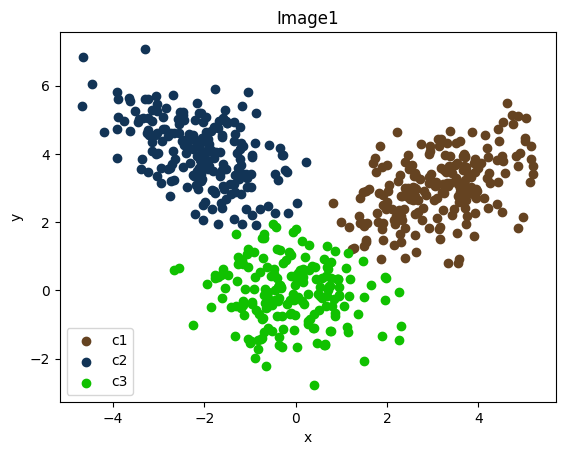

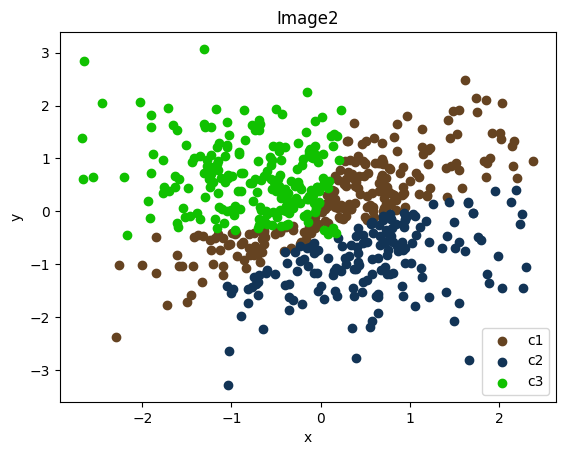

In [63]:
f1 = plt.figure(1)
myr=R1
colors=['#123456','#654321','#10c100']
mydf=df1.loc[:,("1","0")]
mydf["c1"]=myr[:,1]
mydf["c2"]=myr[:,0]
mydf["c3"]=myr[:,2]
plt.scatter(mydf.loc[mydf["c1"]==1,"0"], mydf.loc[mydf["c1"]==1,"1"], c=colors[1], label='c1')
plt.scatter(mydf.loc[mydf["c2"]==1,"0"], mydf.loc[mydf["c2"]==1,"1"], c=colors[0], label='c2')
plt.scatter(mydf.loc[mydf["c3"]==1,"0"], mydf.loc[mydf["c3"]==1,"1"], c=colors[2], label='c3')
plt.legend(loc="upper left")
plt.title("Image1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();
f1.show()
## next!
f2 = plt.figure(2)
myr=R2
mydf=df2.loc[:,("1","0")]
mydf["c1"]=myr[:,1]
mydf["c2"]=myr[:,0]
mydf["c3"]=myr[:,2]
plt.scatter(mydf.loc[mydf["c1"]==1,"0"], mydf.loc[mydf["c1"]==1,"1"], c=colors[1], label='c1')
plt.scatter(mydf.loc[mydf["c2"]==1,"0"], mydf.loc[mydf["c2"]==1,"1"], c=colors[0], label='c2')
plt.scatter(mydf.loc[mydf["c3"]==1,"0"], mydf.loc[mydf["c3"]==1,"1"], c=colors[2], label='c3')
plt.legend(loc="upper left")
plt.title("Image2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();
f2.show()

# Simulation Question 5:

In [64]:
print("Means for Image1:")
print(means1)
print("Covariances for Image1:")
print(covs1)
print("Pis for Image1:")
print(pis1)
print("Means for Image2:")
print(means2)
print("Covariances for Image2:")
print(covs2)
print("Pis for Image2:")
print(pis2)

Means for Image1:
[[-2.08813563  4.06679726]
 [ 3.10318959  2.98038447]
 [-0.12367198 -0.07042359]]
Covariances for Image1:
[[[ 0.89077281 -0.48958809]
  [-0.48958809  0.98895482]]

 [[ 1.06528977  0.50241227]
  [ 0.50241227  0.96253536]]

 [[ 0.90045025 -0.07791917]
  [-0.07791917  0.858425  ]]]
Pis for Image1:
[0.34036951 0.34092235 0.31870814]
Means for Image2:
[[ 0.26242782 -0.51834507]
 [ 0.20265107  0.19532925]
 [-0.42365459  0.35911466]]
Covariances for Image2:
[[[ 0.89243623  0.09104826]
  [ 0.09104826  0.83480887]]

 [[ 0.9207956   0.55640982]
  [ 0.55640982  0.74963079]]

 [[ 0.79689219 -0.31550747]
  [-0.31550747  0.77819194]]]
Pis for Image2:
[0.30154043 0.30533555 0.39312402]


In image1, the datapoints are concentrated at three different regions clearly. Therefore it is obvious that they have come from 3 different distributions. So, even by shuffling the dataframe at first and then using the described algorithm for initialization of parameters, and even with small numbers of iteration, we would have the parameters converged approximately to their actual value.
In which the means of three MVN distributions, have considerable distances from each other; so that the clustering is approximately correct.

While in image2 the means of the distributions are so close that it becomes very difficult to separate them from each other, and we may reach different results for clustering in different iterations of the whole algorithm and have a lower percentage of accuracy.(concentration of the most points is at the centre of the picture and they are too close together.)

The fact that clustering the second image is more difficult could also be seen by the calculated means of the last iteration of the algorithm, in which for the first image we see a high level of diversity, but for image2 the opposite; although there are some differences in covs and pis matrices of the two, the main difference seems to be due to the means at the end.

On the other hand, the final answer becomes too sensitive to the initialization. And different initializations make different means so that the clustering may differ significantly(Actually for the central points). That shows the lower accuracy percentage of the algorithm in this photo compared to the previous photo.
Of course we tried several initialization algorithms to work better for generalized problem and different datasets. That the one which is used is the best and has less differences in the results compared to the others
